In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 1: Load the dataset
file_path = 'evdataset.csv'
data = pd.read_csv(file_path)


In [3]:
# Step 2: Data Cleaning and Feature Selection
# Selecting relevant columns for prediction
features = [
    'City - Cold Weather', 'Highway - Cold Weather', 'City - Mild Weather', 
    'Highway - Mild Weather', 'Acceleration 0 - 100 km/h', 'Top Speed', 
    'Total Power', 'Battery Capacity', 'Seats', 'Drive'
]
target = 'Combined - Mild Weather'

# Filter dataset for relevant columns
data = data[features + [target]]

# Handle missing values (if any)
data = data.dropna()


In [4]:
# Step 3: Train-Test Split
X = data[features]  # Features
y = data[target]    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 4: Preprocessing
# Define numerical and categorical features
numerical_features = [
    'City - Cold Weather', 'Highway - Cold Weather', 'City - Mild Weather', 
    'Highway - Mild Weather', 'Acceleration 0 - 100 km/h', 'Top Speed', 
    'Total Power', 'Battery Capacity', 'Seats'
]
categorical_features = ['Drive']

# Create transformations for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformations in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [6]:
# Step 5: Model Building
# Create a pipeline with preprocessing and RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model on the training data
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['City - Cold Weather',
                                                   'Highway - Cold Weather',
                                                   'City - Mild Weather',
                                                   'Highway - Mild Weather',
                                                   'Acceleration 0 - 100 km/h',
                                                   'Top Speed', 'Total Power',
                                                   'Battery Capacity',
                                                   'Seats']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Drive'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [7]:
# Step 6: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 85.06
R² Score: 0.9944


In [8]:
# Step 7: Generate Predictions for Test Data
# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual Range (km)': y_test,
    'Predicted Range (km)': y_pred
}).reset_index(drop=True)

# Display a sample of the predictions
print("\nSample Predictions:")
print(results.head())



Sample Predictions:
   Actual Range (km)  Predicted Range (km)
0                505                499.20
1                225                221.45
2                740                692.35
3                325                326.60
4                700                690.00


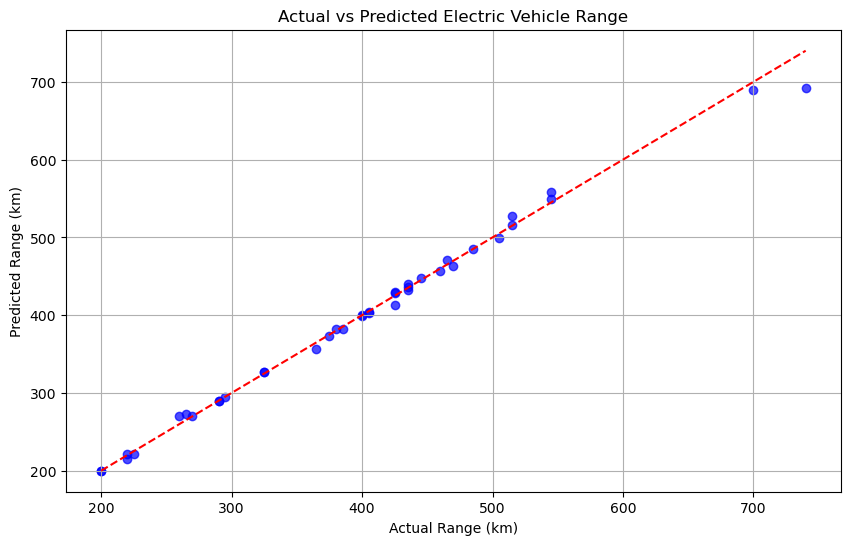

In [9]:
# Step 8: Visualization
# Plot actual vs predicted ranges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Electric Vehicle Range')
plt.xlabel('Actual Range (km)')
plt.ylabel('Predicted Range (km)')
plt.grid()
plt.show()


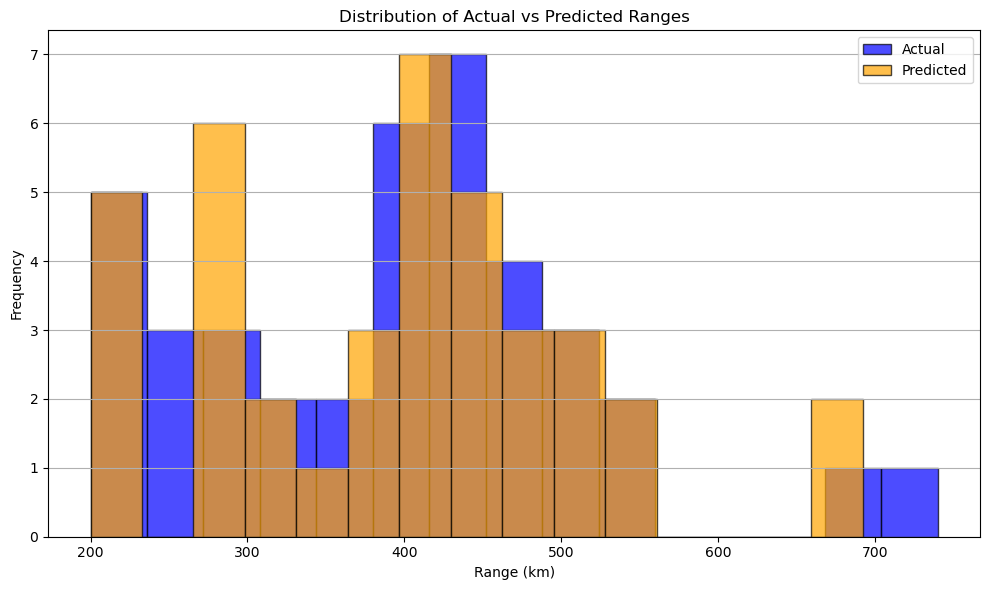

In [12]:
# Visualization 2: Distribution of Actual vs Predicted Values
plt.figure(figsize=(10, 6))

# Create histograms for actual and predicted values
plt.hist(y_test, bins=15, alpha=0.7, label='Actual', color='blue', edgecolor='black')
plt.hist(y_pred, bins=15, alpha=0.7, label='Predicted', color='orange', edgecolor='black')

# Display the title, labels, and legend
plt.title('Distribution of Actual vs Predicted Ranges')
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.legend()

# Show the grid and plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


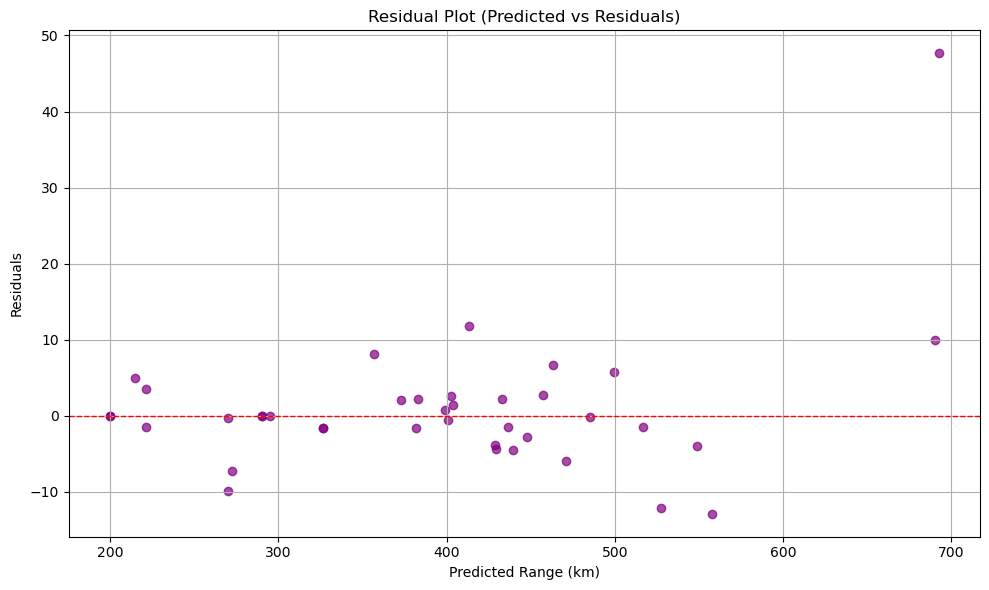

In [13]:
# Visualization 3: Residual Plot
residuals = y_test - y_pred

# Create a scatter plot for residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')

# Add horizontal line at y = 0 (zero residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Display title and labels
plt.title('Residual Plot (Predicted vs Residuals)')
plt.xlabel('Predicted Range (km)')
plt.ylabel('Residuals')

# Show the grid and plot
plt.grid()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

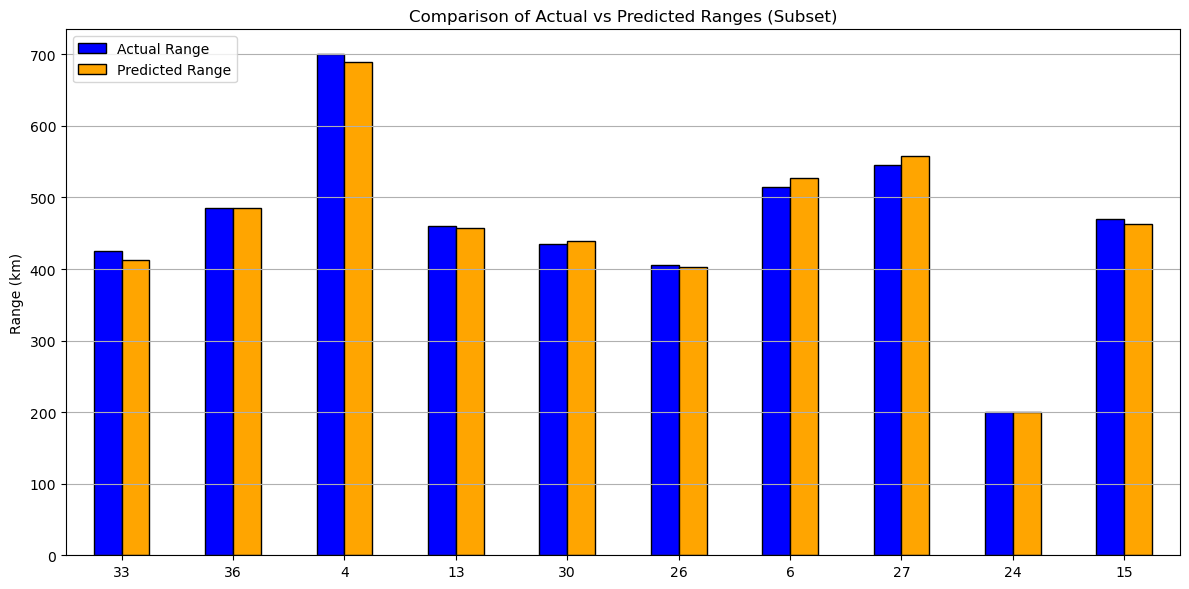

In [14]:
# Visualization 4: Performance Comparison (Subset of Test Data)
# Select a random small subset for better visualization
comparison_subset = results.sample(10, random_state=42)

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
comparison_subset.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'], edgecolor='black')

# Display title, labels, and legend
plt.title('Comparison of Actual vs Predicted Ranges (Subset)')
plt.ylabel('Range (km)')
plt.xticks(range(len(comparison_subset)), comparison_subset.index, rotation=0)
plt.legend(['Actual Range', 'Predicted Range'], loc='upper left')

# Show grid and plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [15]:
# Step 7.1: Generate Predictions for the Test Data
# Use the trained model to predict the ranges for the test set
y_pred = model.predict(X_test)


In [16]:
# Step 7.2: Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual Range (km)': y_test,
    'Predicted Range (km)': y_pred
}).reset_index(drop=True)


In [17]:
# Step 7.3: Display a sample of the predictions
print("\nSample Predictions:")
print(results.head())



Sample Predictions:
   Actual Range (km)  Predicted Range (km)
0                505                499.20
1                225                221.45
2                740                692.35
3                325                326.60
4                700                690.00


In [18]:
# Step 7.4: Display all predictions (optional)
print("\nFull Predictions:")
print(results)



Full Predictions:
    Actual Range (km)  Predicted Range (km)
0                 505                499.20
1                 225                221.45
2                 740                692.35
3                 325                326.60
4                 700                690.00
5                 425                428.80
6                 515                527.20
7                 445                447.85
8                 515                516.55
9                 465                471.00
10                405                403.65
11                545                548.95
12                375                372.90
13                460                457.30
14                400                399.30
15                470                463.35
16                325                326.60
17                435                432.85
18                220                221.45
19                220                215.00
20                290                290.05
21           